In [1]:
library(xlsx)

In [3]:
df = read.xlsx('students.xls', sheetName='Full')
print('Content of the file:')
head(df)

[1] "Content of the file:"


,ID,LastÂ.Name,First.Name,City,State,Gender,Student.Status,Major,Country,Age,...,NA..12,NA..13,NA..14,NA..15,NA..16,NA..17,NA..18,NA..19,NA..20,NA..21
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,1,DOE01,JANE01,Los Angeles,California,Female,Graduate,Politics,US,30,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,DOE02,JANE02,Sedona,Arizona,Female,Undergraduate,Math,US,19,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,DOE01,JOE01,Elmira,New York,Male,Graduate,Math,US,26,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,DOE02,JOE02,Lackawana,New York,Male,Graduate,Econ,US,33,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,DOE03,JOE03,Defiance,Ohio,Male,Graduate,Econ,US,37,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,6,DOE04,JOE04,Tel Aviv,Israel,Male,Graduate,Econ,Israel,25,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
df = df[colSums(!is.na(df))>0]

In [5]:
df = na.omit(df)

In [6]:
df = df[,4:14]
head(df)

,City,State,Gender,Student.Status,Major,Country,Age,SAT,Average.score..grade.,Height..in.,Newspaper.readership..times.wk.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Los Angeles,California,Female,Graduate,Politics,US,30,2263,67.00000,61,5
2,Sedona,Arizona,Female,Undergraduate,Math,US,19,2006,63.00000,64,7
3,Elmira,New York,Male,Graduate,Math,US,26,2221,78.11328,73,6
4,Lackawana,New York,Male,Graduate,Econ,US,33,1716,77.80859,68,3
5,Defiance,Ohio,Male,Graduate,Econ,US,37,1701,65.00000,71,6
6,Tel Aviv,Israel,Male,Graduate,Econ,Israel,25,1786,69.00000,67,5


In [7]:
str(df)

'data.frame':	30 obs. of  11 variables:
 $ City                           : chr  "Los Angeles" "Sedona" "Elmira" "Lackawana" ...
 $ State                          : chr  "California" "Arizona" "New York" "New York" ...
 $ Gender                         : chr  "Female" "Female" "Male" "Male" ...
 $ Student.Status                 : chr  "Graduate" "Undergraduate" "Graduate" "Graduate" ...
 $ Major                          : chr  "Politics" "Math" "Math" "Econ" ...
 $ Country                        : chr  "US" "US" "US" "US" ...
 $ Age                            : num  30 19 26 33 37 25 39 21 18 33 ...
 $ SAT                            : num  2263 2006 2221 1716 1701 ...
 $ Average.score..grade.          : num  67 63 78.1 77.8 65 ...
 $ Height..in.                    : num  61 64 73 68 71 67 70 62 62 66 ...
 $ Newspaper.readership..times.wk.: num  5 7 6 3 6 5 5 5 6 5 ...


In [8]:
summary(df)

     City              State              Gender          Student.Status    
 Length:30          Length:30          Length:30          Length:30         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    Major             Country               Age            SAT      
 Length:30          Length:30          Min.   :18.0   Min.   :1338  
 Class :character   Class :character   1st Qu.:19.0   1st Qu.:1658  
 Mode  :character   Mode  :character   Median :23.0   Median :1817  
                                       Mean   :25.2   Mean   :1849  
                                       3rd Qu.:30.0   3rd Qu.:2032  
                                       Max.   :

In [9]:
major = table(df$Major)
colors1 = c('red','yellow','green')

gender = table(df$Gender)
colors2 = c('blue','pink')

status = table(df$Student.Status)
colors3 = c('violet','cyan')

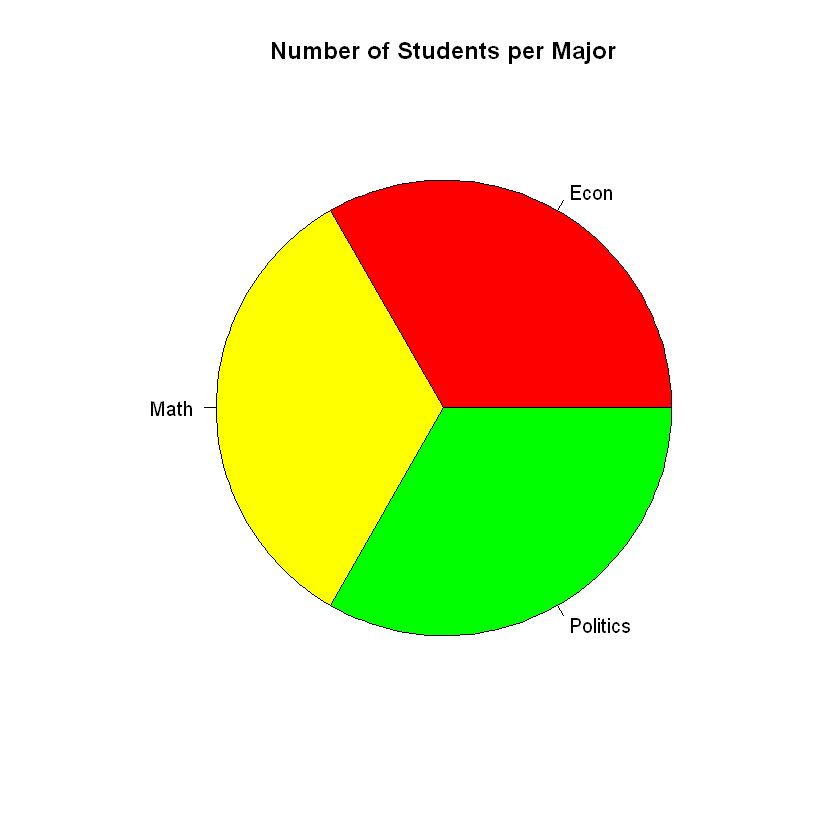

In [10]:
pie(major, col=colors1, main = 'Number of Students per Major')

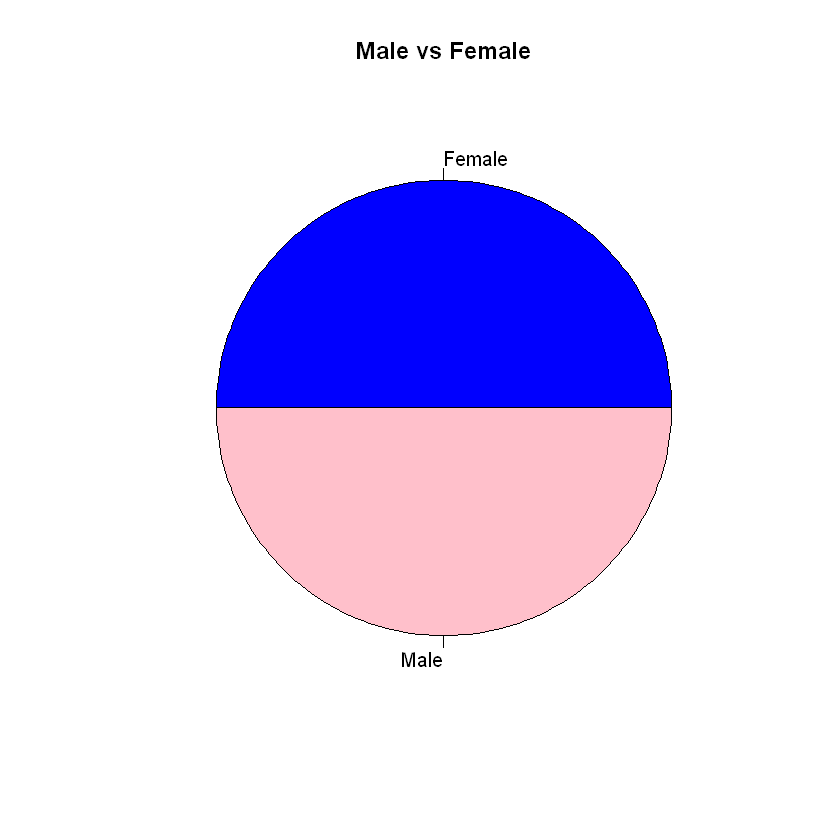

In [11]:
pie(gender, col=colors2, main = 'Male vs Female')

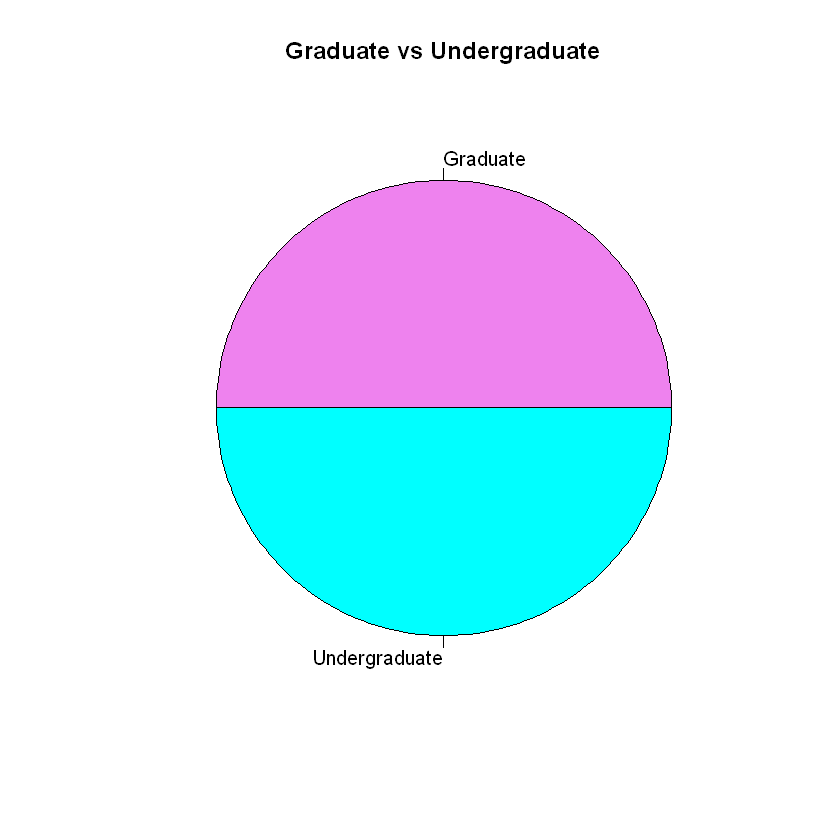

In [12]:
pie(status, col=colors3, main = 'Graduate vs Undergraduate')

In [13]:
# calculate variance for all attributes
sapply(df[7:11],var)

Age                             SAT 
                      47.200000                    75686.713793 
          Average.score..grade.                     Height..in. 
                     102.130104                       21.702299 
Newspaper.readership..times.wk. 
                       1.636782

In [14]:
# calculate sd for all attributes
sapply(df[7:11],sd)

Age                             SAT 
                       6.870226                      275.112184 
          Average.score..grade.                     Height..in. 
                      10.105944                        4.658573 
Newspaper.readership..times.wk. 
                       1.279368

In [19]:
library(e1071)
# calculate skewness for all attributes
apply(df[,7:11],2,skewness)

Age                             SAT 
                     0.50270966                      0.14044713 
          Average.score..grade.                     Height..in. 
                    -0.10137424                      0.15508544 
Newspaper.readership..times.wk. 
                    -0.04683474

In [20]:
# calculate kurtosis for all attributes
apply(df[,7:11],2,kurtosis)

Age                             SAT 
                      -1.202428                       -1.042817 
          Average.score..grade.                     Height..in. 
                      -1.156974                       -1.215848 
Newspaper.readership..times.wk. 
                      -1.141655

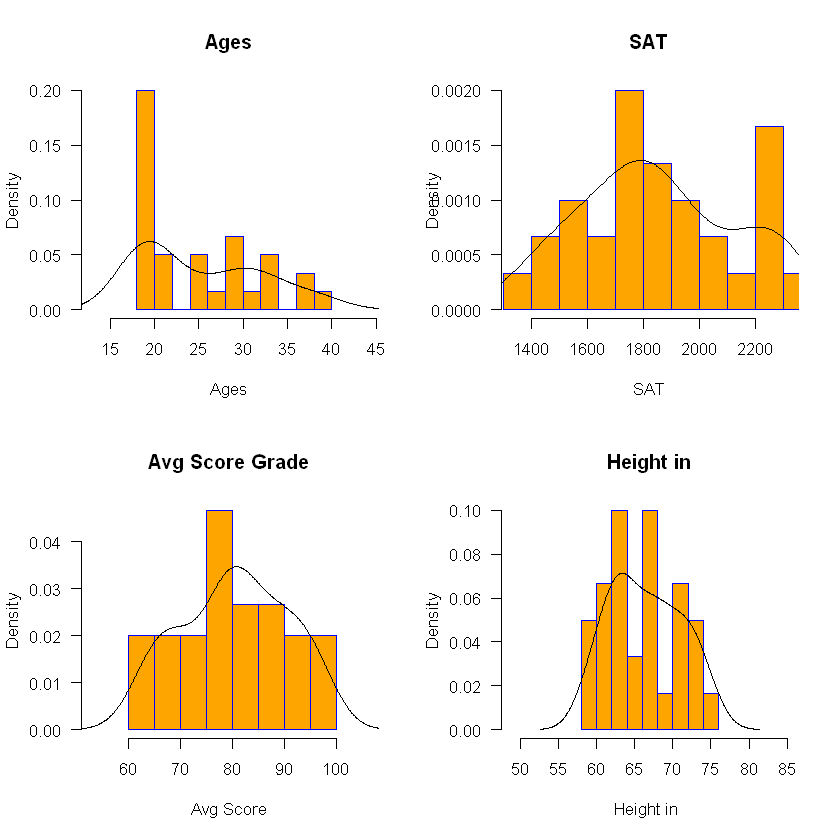

In [23]:
par(mfrow=c(2,2))

# Create the histogram
hist(df$Age, main = 'Ages',
     xlab='Ages',
     xlim = c(min(df$Age)-5,max(df$Age)+5),
     col='orange',
     breaks=10, border='blue',
     # so lieu tren y theo hang ngang
    las = 1, 
    freq = FALSE)
lines(density(df$Age))

hist(df$SAT, main = 'SAT',
     xlab='SAT',
     xlim = c(min(df$SAT)-5,max(df$SAT)+5),
     col='orange',
     breaks=10, border='blue',
     # so lieu tren y theo hang ngang
    las = 1, 
    freq = FALSE)
lines(density(df$SAT))

hist(df$Average.score..grade., main = 'Avg Score Grade',
     xlab='Avg Score',
     xlim = c(min(df$Average.score..grade.)-10,max(df$Average.score..grade.)+10),
     col='orange',
     breaks=10, border='blue',
     # so lieu tren y theo hang ngang
    las = 1, 
    freq = FALSE)
lines(density(df$Average.score..grade.))

hist(df$Height..in., main = 'Height in',
     xlab='Height in ',
     xlim = c(min(df$Height..in.)-10,max(df$Height..in.)+10),
     col='orange',
     breaks=10, border='blue',
     # so lieu tren y theo hang ngang
    las = 1, 
    freq = FALSE)
lines(density(df$Height..in.))